In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [2]:
(ds_train, ds_test), ds_info = tfds.load('kmnist', split=['train[:1%]', 'test'], as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/3.0.1.incompleteG4QEKM/kmnist-train.tfrecord*...:   0%|          | …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/3.0.1.incompleteG4QEKM/kmnist-test.tfrecord*...:   0%|          | 0…

Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
# Convert the datasets to numpy arrays
train_data = tfds.as_numpy(ds_train)
test_data = tfds.as_numpy(ds_test)

X_train, y_train = zip(*train_data)
X_test, y_test = zip(*test_data)

In [4]:
X_train = [x[0] for x in tfds.as_numpy(ds_train)]
X_test = [x[0] for x in tfds.as_numpy(ds_test)]

In [5]:
X_train = [tf.image.resize(image, (28, 28)).numpy() for image in X_train]
X_test = [tf.image.resize(image, (28, 28)).numpy() for image in X_test]
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
X_train /= 255.0
X_test /= 255.0

In [6]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (600, 28, 28, 1)
600 train samples
10000 test samples


In [7]:
temp=X_train
X_train=X_test
X_test=temp

In [8]:
X_train = tf.reshape(X_train, (len(X_train), np.prod(X_train.shape[1:])))
X_test = tf.reshape(X_test, (len(X_test), np.prod(X_test.shape[1:])))

In [9]:
input_size = 784
hidden_size = 64
output_size = 784

In [11]:
x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(64, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)
autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [12]:
epochs = 5
batch_size = 128
history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/5
79/79 [==============================] - 2s 10ms/step - loss: 0.1279 - accuracy: 0.0015 - val_loss: 0.1021 - val_accuracy: 0.0000e+00
Epoch 2/5
79/79 [==============================] - 1s 7ms/step - loss: 0.0902 - accuracy: 0.0030 - val_loss: 0.0855 - val_accuracy: 0.0000e+00
Epoch 3/5
79/79 [==============================] - 1s 7ms/step - loss: 0.0763 - accuracy: 0.0053 - val_loss: 0.0733 - val_accuracy: 0.0000e+00
Epoch 4/5
79/79 [==============================] - 1s 7ms/step - loss: 0.0665 - accuracy: 0.0069 - val_loss: 0.0647 - val_accuracy: 0.0017
Epoch 5/5
79/79 [==============================] - 1s 7ms/step - loss: 0.0599 - accuracy: 0.0073 - val_loss: 0.0597 - val_accuracy: 0.0000e+00


19/19 [==============================] - 0s 2ms/step


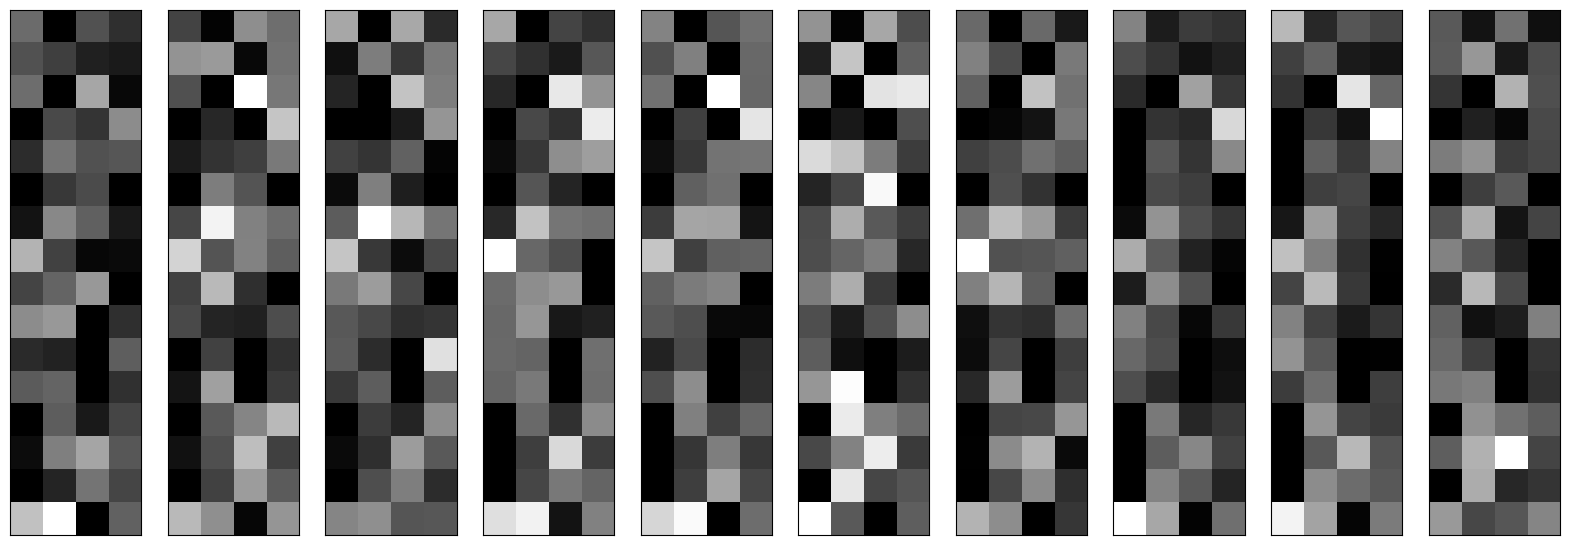

In [13]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
decoded_imgs = autoencoder.predict(X_test)

19/19 [==============================] - 0s 2ms/step


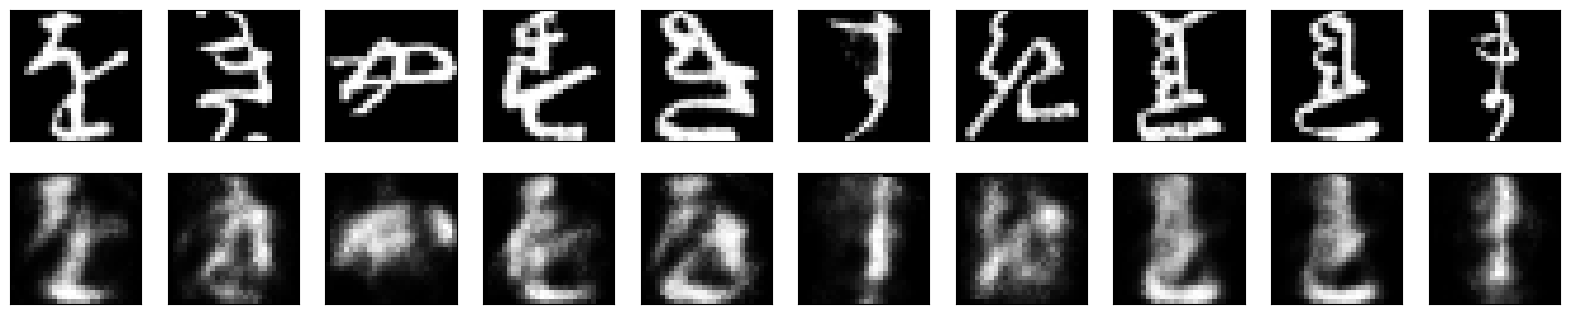

In [15]:
plt.figure(figsize=(20, 6))
n = 10
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(tf.reshape(X_test[i], (28, 28)), cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(tf.reshape(decoded_imgs[i], (28, 28)), cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


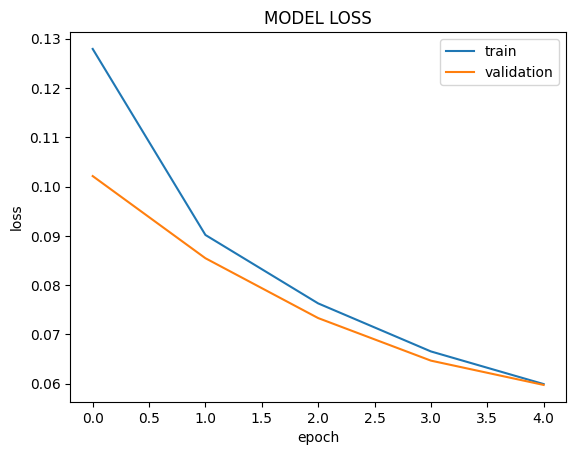

In [16]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [17]:
import pickle
# Save the trained model
autoencoder.save('autoencoder_model')
# Save the training history
with open('training_history.pkl', 'wb') as history_file:
    pickle.dump(history.history, history_file)